In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [3]:
annual_return = pd.read_csv("annual.csv", header=None)
avg = annual_return[1].mean()

Text(0.5, 1.0, 'Annual Returns of SP500 since 1926')

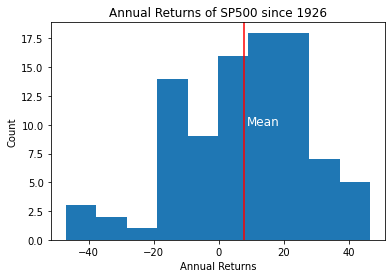

In [4]:
plt.hist(annual_return[1])
plt.axvline(x=avg, color='red')
plt.text(avg+1,10,'Mean',rotation=0, color = 'white', fontsize='large')
plt.ylabel("Count")
plt.xlabel("Annual Returns")
plt.title("Annual Returns of SP500 since 1926")

Text(10000, -7, 'Threshold')

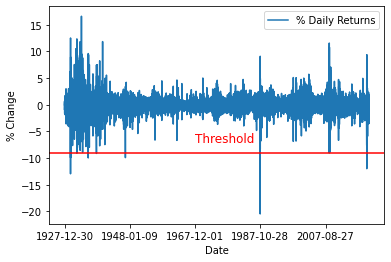

In [5]:
EOD_data_df = pd.read_csv("sp500.csv")
EOD_data_df["pct daily return"] = 0.00

for i in range(1, len(EOD_data_df)):
    EOD_data_df['pct daily return'][i] = ((EOD_data_df['Adj Close'][i] - EOD_data_df['Adj Close'][i-1]) / EOD_data_df['Adj Close'][i-1]) * 100

EOD_data_df.plot(x="Date",y="pct daily return",label="% Daily Returns")
plt.ylabel("% Change")
plt.axhline(y=-9, color='red')
plt.text(10000,-7,'Threshold',rotation=0, color = 'red', fontsize='large')

In [7]:
annual_return = annual_return.rename(columns={0:"Year",1:"Return"})
annual_return["pct return"] = 0.00
annual_return["port"] = 0.00

for i in range(1, len(annual_return)):
    annual_return['pct return'][i] = (annual_return["Return"][i] / 100)

In [8]:
annual_return_recent = annual_return[annual_return["Year"]>1990]

In [9]:
today_port_val = 10000
reg_inv = 10000
port_val_us_poor = []
no_adds = 0
previousi = 0

for i in range(1,len(annual_return_recent)):
    if annual_return_recent.iloc[-(i),1]<=-5:
        today_port_val = ((today_port_val)*(1+(annual_return_recent.iloc[-(i-1),2])))+(reg_inv*len(annual_return_recent.iloc[-previousi:-i]))
        port_val_us_poor.append(today_port_val)
        previousi+=1
    else:
        today_port_val = today_port_val*(1+annual_return_recent.iloc[-(i-1),2])
        port_val_us_poor.append(today_port_val)

In [10]:
today_port_val = 10000
reg_inv = 10000
port_val_us_reg = []

for i in range(1,len(annual_return_recent)):
    today_port_val = (today_port_val+reg_inv)*(1+annual_return_recent.iloc[-(i-1),2])
    port_val_us_reg.append(today_port_val)

In [11]:
port_val_us_poor.reverse()
port_val_us_reg.reverse()
port_val_us_poor.insert(0, port_val_us_poor[1]*1.0658)
port_val_us_reg.insert(0, port_val_us_reg[1]*1.0658)
annual_return_recent['Portfolio Value'] = port_val_us_poor
annual_return_recent['Portfolio Value Reg'] = port_val_us_reg

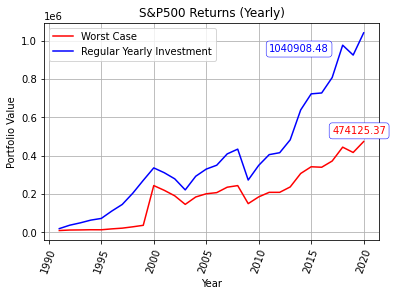

In [12]:
fig, ax = plt.subplots()
ax.plot("Year", "Portfolio Value", data=annual_return_recent, color='r')
ax.plot("Year", "Portfolio Value Reg", data=annual_return_recent, color='b')
plt.setp(ax.get_xticklabels(), rotation=70, ha="center")
plt.annotate("%.2f" % annual_return_recent.iloc[0,4], xy=(2017,annual_return_recent.iloc[0,4]+40000), xycoords='data', color='r', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=0.5))
plt.annotate("%.2f" % annual_return_recent.iloc[0,5], xy=(2011,annual_return_recent.iloc[0,5]-100000), xycoords='data', color='b', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=0.5))
ax.legend(['Worst Case','Regular Yearly Investment'])
plt.ylabel("Portfolio Value")
plt.xlabel("Year")
plt.title("S&P500 Returns (Yearly)")
plt.grid()

In [ ]:
### Import S&P500 Monthly Data

In [13]:
EOM_SP_df = pd.read_csv("sp500m.csv")
EOM_SP_df["pct monthly return"] = 0.00

for i in range(1, len(EOM_SP_df)):
    EOM_SP_df['pct monthly return'][i] = ((EOM_SP_df['Adj Close'][i] - EOM_SP_df['Adj Close'][i-1]) / EOM_SP_df['Adj Close'][i-1]) * 100

EOM_SP_df['Date'] = pd.to_datetime(EOM_SP_df['Date'])
EOM_SP_df = EOM_SP_df[EOM_SP_df["Date"]>"1989-12-01"]

In [14]:
today_port_val = 10000
reg_inv = 10000/12
port_val_us_poor = []
no_adds = 0

for i in range(1,len(EOM_SP_df)):
    if EOM_SP_df.iloc[(i),7]<=-10:
        today_port_val = ((today_port_val)*(1+(EOM_SP_df.iloc[(i-1),7]/100)))+(reg_inv*len(EOM_SP_df.iloc[previousi:i]))
        port_val_us_poor.append(today_port_val)
        previousi = i
    else:
        today_port_val = today_port_val*(1+(EOM_SP_df.iloc[(i-1),7]/100))
        port_val_us_poor.append(today_port_val)

In [15]:
today_port_val = 10000
reg_inv = 10000/12
port_val_us_reg = []
no_adds = 0

for i in range(1,len(EOM_SP_df)):
    today_port_val = (today_port_val+reg_inv)*(1+(EOM_SP_df.iloc[(i-1),7]/100))
    port_val_us_reg.append(today_port_val)


In [16]:
today_port_val = 10000
reg_inv = 10000/12
port_val_us_sav = []
no_adds = 0

for i in range(1,len(EOM_SP_df)):
    today_port_val = today_port_val+reg_inv
    port_val_us_sav.append(today_port_val)

In [17]:
port_val_us_poor.append(port_val_us_poor[-1])
port_val_us_reg.append(port_val_us_reg[-1])
port_val_us_sav.append(port_val_us_sav[-1])

In [18]:
EOM_SP_df['Portfolio Value Reg'] = port_val_us_reg
EOM_SP_df['Portfolio Value (Worst Case)'] = port_val_us_poor
EOM_SP_df['Portfolio Value (Saving)'] = port_val_us_sav

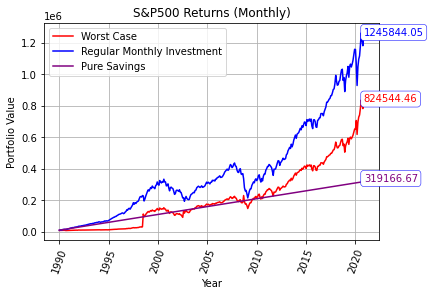

In [19]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.plot("Date", "Portfolio Value (Worst Case)", data=EOM_SP_df, color='r')
ax.plot("Date", "Portfolio Value Reg", data=EOM_SP_df, color='b')
ax.plot("Date", "Portfolio Value (Saving)", data=EOM_SP_df, color='purple')
years = mdates.YearLocator(5) 
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
plt.setp(ax.get_xticklabels(), rotation=70, ha="center")
plt.annotate("%.2f" % EOM_SP_df.iloc[-1,9], xy=(mdates.date2num(EOM_SP_df.iloc[-1,0]),EOM_SP_df.iloc[-1,9]), xycoords='data', color='r', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=0.5))
plt.annotate("%.2f" % EOM_SP_df.iloc[-1,8], xy=(mdates.date2num(EOM_SP_df.iloc[-1,0]),EOM_SP_df.iloc[-1,8]+1000), xycoords='data', color='b', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=0.5))
plt.annotate("%.2f" % EOM_SP_df.iloc[-1,10], xy=(mdates.date2num(EOM_SP_df.iloc[-1,0]),EOM_SP_df.iloc[-1,10]+1000), xycoords='data', color='purple', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=0.5))
ax.legend(['Worst Case','Regular Monthly Investment','Pure Savings'])
plt.ylabel("Portfolio Value")
plt.xlabel("Year")
plt.title("S&P500 Returns (Monthly)")
plt.grid()

In [560]:
EOY_SP_df = annual_return_recent

ears = []

for i in range(1991,2021,1):
    currenty = ("{}-01-01".format(i))
    ears.append(currenty)

ears.reverse()
EOY_SP_df['Date'] = ears

In [561]:
EOY_SP_df['Date'] = pd.to_datetime(EOY_SP_df['Date'])

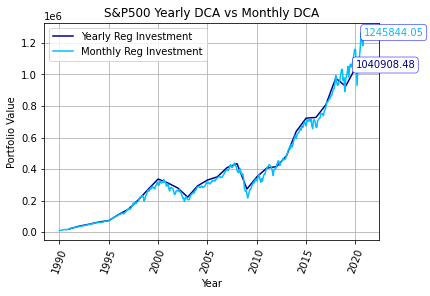

In [612]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.plot("Date", "Portfolio Value Reg", data=EOY_SP_df, color='darkblue')
ax.plot("Date", "Portfolio Value Reg", data=EOM_SP_df, color='deepskyblue')
years = mdates.YearLocator(5) 
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
plt.setp(ax.get_xticklabels(), rotation=70, ha="center")
plt.annotate("%.2f" % EOY_SP_df.iloc[0,5], xy=(mdates.date2num(EOY_SP_df.iloc[0,6]),EOY_SP_df.iloc[0,5]), xycoords='data', color='darkblue',bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=0.5))
plt.annotate("%.2f" % EOM_SP_df.iloc[-1,8], xy=(mdates.date2num(EOM_SP_df.iloc[-1,0]),EOM_SP_df.iloc[-1,8]+1000), xycoords='data', color='deepskyblue',bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=0.5))
ax.legend(['Yearly Reg Investment','Monthly Reg Investment'])
plt.ylabel("Portfolio Value")
plt.xlabel("Year")
plt.title("S&P500 Yearly DCA vs Monthly DCA")
plt.grid()

In [34]:
EOM_STI_df = pd.read_csv("stim.csv")
EOM_STI_df["pct monthly return"] = 0.00

for i in range(1, len(EOM_STI_df)):
    EOM_STI_df['pct monthly return'][i] = ((EOM_STI_df['Adj Close'][i] - EOM_STI_df['Adj Close'][i-1]) / EOM_STI_df['Adj Close'][i-1]) * 100

EOM_STI_df['Date'] = pd.to_datetime(EOM_STI_df['Date'])

In [35]:
today_port_val = 10000
reg_inv = 10000/12
port_val_poor = []
no_adds = 0
previousi = 0

for i in range(1,len(EOM_STI_df)):
    if EOM_STI_df.iloc[(i),7]<=-10:
        today_port_val = ((today_port_val)*(1+(EOM_STI_df.iloc[(i-1),7]/100)))+(reg_inv*len(EOM_STI_df.iloc[previousi:i]))
        port_val_poor.append(today_port_val)
        previousi = i
    else:
        today_port_val = today_port_val*(1+(EOM_STI_df.iloc[(i-1),7]/100))
        port_val_poor.append(today_port_val)

In [36]:
today_port_val = 10000
reg_inv = 10000/12
port_val_reg = []
no_adds = 0

for i in range(1,len(EOM_STI_df)):
    today_port_val = (today_port_val+reg_inv)*(1+(EOM_STI_df.iloc[(i-1),7]/100))
    port_val_reg.append(today_port_val)
    no_adds+=1

In [37]:
today_port_val = 10000
reg_inv = 10000/12
port_val_sav = []
no_adds = 0

for i in range(1,len(EOM_STI_df)):
    today_port_val = today_port_val+reg_inv
    port_val_sav.append(today_port_val)


In [38]:
port_val_poor.append(port_val_poor[-1])
port_val_reg.append(port_val_reg[-1])
port_val_sav.append(port_val_sav[-1])

In [39]:
EOM_STI_df['Portfolio Value Reg'] = port_val_reg
EOM_STI_df['Portfolio Value (Worst Case)'] = port_val_poor
EOM_STI_df['Portfolio Value (Savings)'] = port_val_sav

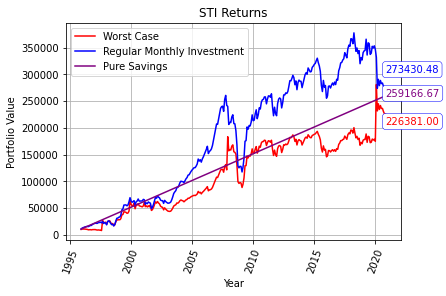

In [40]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.plot("Date", "Portfolio Value (Worst Case)", data=EOM_STI_df, color='r')
ax.plot("Date", "Portfolio Value Reg", data=EOM_STI_df, color='b')
ax.plot("Date", "Portfolio Value (Savings)", data=EOM_STI_df, color='purple')
years = mdates.YearLocator(5) 
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
plt.setp(ax.get_xticklabels(), rotation=70, ha="center")
plt.annotate("%.2f" % EOM_STI_df.iloc[-1,9], xy=(mdates.date2num(EOM_STI_df.iloc[-1,0]),EOM_STI_df.iloc[-1,9]-20000), xycoords='data', color='r', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=0.5))
plt.annotate("%.2f" % EOM_STI_df.iloc[-1,8], xy=(mdates.date2num(EOM_STI_df.iloc[-1,0]),EOM_STI_df.iloc[-1,8]+30000), xycoords='data', color='b', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=0.5))
plt.annotate("%.2f" % EOM_STI_df.iloc[-1,10], xy=(mdates.date2num(EOM_STI_df.iloc[-1,0]),EOM_STI_df.iloc[-1,10]), xycoords='data', color='purple', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=0.5))
ax.legend(['Worst Case','Regular Monthly Investment','Pure Savings'])
plt.ylabel("Portfolio Value")
plt.xlabel("Year")
plt.title("STI Returns")
plt.grid()

In [108]:
mdates.date2num("1989-01-12")

array(6951.)

In [66]:
mean = EOM_MBH_dtf['pct monthly return'].mean()/100
stdd = EOM_MBH_dtf['pct monthly return'].std()/100

print("Mean: {}\n Std Dev: {}".format(mean, stdd))

Mean: 0.0014884904507350286
 Std Dev: 0.01838698190010754


In [65]:
EOM_MBH_dtf = pd.read_csv("bonddiv.csv")
EOM_MBH_dtf["pct monthly return"] = 0.00

for i in range(1, len(EOM_MBH_dtf)):
    EOM_MBH_dtf['pct monthly return'][i] = ((EOM_MBH_dtf['Close'][i] - EOM_MBH_dtf['Close'][i-1]) / EOM_MBH_dtf['Close'][i-1]) * 100

In [60]:
EOM_MBH_dtf

,Date,Open,High,Low,Close,Adj Close,Volume,pct monthly return
0,2009-10-01,25.139999,25.860001,25.139999,25.680000,25.680000,3075.0,0.000000
1,2009-11-01,25.680000,1548.109985,24.799999,1542.140015,1542.140015,50963.0,5905.218127
2,2009-12-01,1542.140015,1615.589966,1542.140015,1615.589966,1615.589966,5983.0,4.762859
3,2010-01-01,1615.589966,1658.219971,1548.569946,1548.569946,1548.569946,23206.0,-4.148331
4,2010-02-01,1567.949951,1648.800049,1552.369995,1646.280029,1646.280029,13787.0,6.309698
...,...,...,...,...,...,...,...,...
130,2020-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,2020-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,2020-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,2020-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
